<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/binary-cross-entropy.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(binary-cross-entropy)=
# Loss Functions for Binary Classification

Before diving into the math, let's understand why we need to talk about loss functions:

* **Measuring Success**: The loss function tells our model how well (or poorly) it's performing.
* **Guiding Improvement**: It provides the direction for optimization—like a compass pointing toward better predictions.
* **Different Problems, Different Tools**: Choosing the right loss function can dramatically improve how well and how quickly our model learns.


**Binary Cross-Entropy** (also known as log loss) is a loss function commonly used for binary classification tasks. It measures the difference between the true labels and the predicted probabilities (usually produced by a sigmoid activation). The binary cross-entropy loss for a single example is given by:

$$
\ell(y, \hat{y}) = -\left[y \log(\hat{y}) + (1-y) \log(1-\hat{y})\right]
$$

where:
- $y$ is the true label (0 or 1),
- $\hat{y}$ is the predicted probability that the output is 1,
- $\log$ is the natural logarithm.

For a dataset of $N$ examples, the average loss is:

$$
L_{\text{binary}} = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)\right]
$$


In [2]:
import numpy as np

# Define binary cross-entropy loss function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

# Example predictions and actual labels
y_true = np.array([0, 1, 1, 0])
y_pred_good = np.array([0.1, 0.9, 0.8, 0.2])  # good predictions
y_pred_bad = np.array([0.9, 0.1, 0.3, 0.8])   # bad predictions

# Calculate losses
loss_good = binary_cross_entropy(y_true, y_pred_good)
loss_bad = binary_cross_entropy(y_true, y_pred_bad)

print("Good Predictions Loss:", loss_good)
print("Average:", np.mean(loss_good))

print("\nBad Predictions Loss:", loss_bad)
print("Average:", np.mean(loss_bad))


Good Predictions Loss: [0.10536052 0.10536052 0.22314355 0.22314355]
Average: 0.164252033486018

Bad Predictions Loss: [2.30258509 2.30258509 1.2039728  1.60943791]
Average: 1.854645225687032


### Why Use Binary Cross-Entropy?

There are several reasons why binary cross-entropy is a popular choice for binary classification tasks:

* **It Speaks the Language of Probability**
  - Perfect match for sigmoid outputs (0-1 range)
  - Directly measures the "surprise" of seeing the true label given a prediction

* **It Punishes Overconfident Mistakes**
  - Being wrong with 99% confidence hurts much more than being wrong with 51% confidence
  - Creates stronger learning signals when the model makes confident errors
  - Example: Predicting 0.01 when the true label is 1 creates a massive gradient

* **It Plays Well with Gradient Descent**
  - Smooth surface with clear gradients throughout the prediction range
  - No flat spots or sudden drops that could trap or confuse optimization
  - Mathematically elegant connection to *maximum likelihood estimation*


### Why Other Loss Functions Fall Short

Mean Squared Error (MSE) is given by:
$$
\ell_{\text{MSE}}(y, \hat{y}) = (y - \hat{y})^2
$$

MSE is more commonly used for regression tasks, where the model predicts a continuous value. While it's possible to use MSE for binary classification, it has several drawbacks:
* Designed for continuous values, not binary outcomes
* Gradients become weaker for very wrong predictions
* In practical terms: MSE cares more about being "in the ballpark" than being exactly right

Hinge Loss is another loss function used for binary classification, especially in the context of Support Vector Machines (SVMs). It is defined as:
$$
\ell_{\text{hinge}}(y, \hat{y}) = \max(0, 1 - y \cdot \hat{y})
$$

Hinge loss is designed to work well with classifiers that aim to maximize the margin between classes. However, it has some limitations:
* Not as intuitive when the model outputs probabilities: Doesn't distinguish between probabilities of 0.51 and 0.99
* Non-smooth points in the loss function can make optimization more challenging


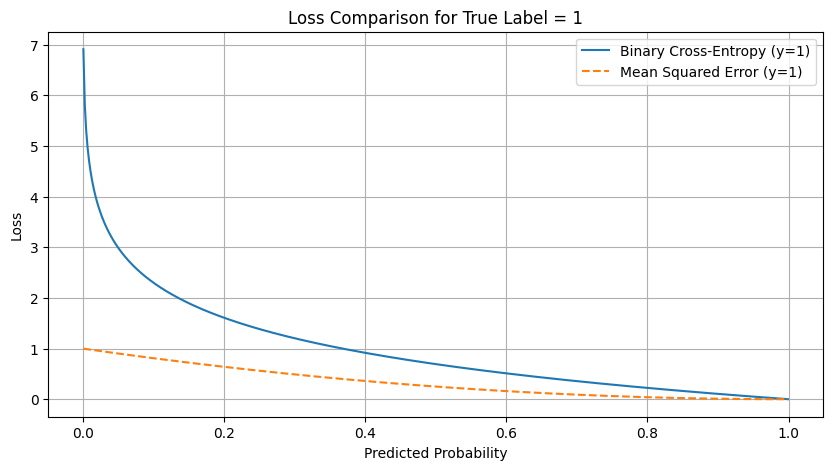

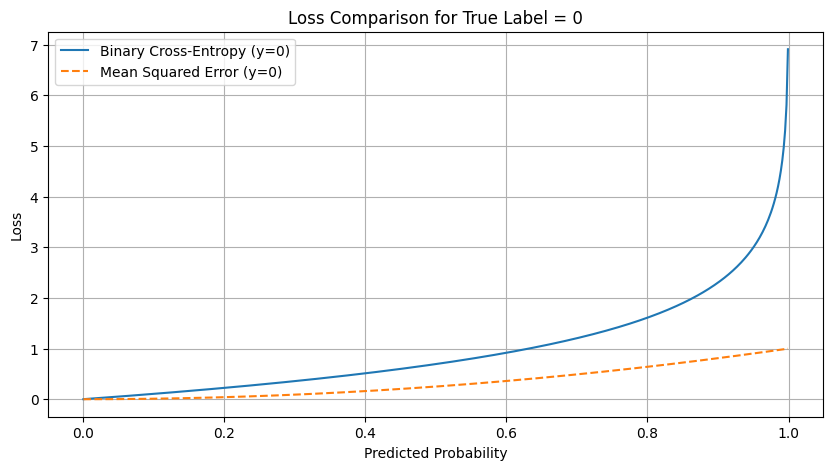

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define binary cross-entropy loss
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define mean squared error loss
def mse_loss(y_true, y_pred):
    return (y_true - y_pred)**2


# Generate predicted probabilities from 0 to 1
y_pred = np.linspace(0.001, 0.999, 500)

# True label (1)
y_true_1 = 1
bce_loss_1 = binary_cross_entropy(y_true_1, y_pred)
mse_loss_1 = mse_loss(y_true_1, y_pred)

# True label (0)
y_true_0 = 0
bce_loss_0 = binary_cross_entropy(y_true_0, y_pred)
mse_loss_0 = mse_loss(y_true_0, y_pred)

# Plot losses for y_true = 1
plt.figure(figsize=(10,5))
plt.plot(y_pred, bce_loss_1, label='Binary Cross-Entropy (y=1)')
plt.plot(y_pred, mse_loss_1, label='Mean Squared Error (y=1)', linestyle='--')
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.title("Loss Comparison for True Label = 1")
plt.legend()
plt.grid(True)
plt.show()

# Plot losses for y_true = 0
plt.figure(figsize=(10, 5))
plt.plot(y_pred, bce_loss_0, label='Binary Cross-Entropy (y=0)')
plt.plot(y_pred, mse_loss_0, label='Mean Squared Error (y=0)', linestyle='--')
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.title("Loss Comparison for True Label = 0")
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Final loss: 0.0060
Final accuracy: 1.0000

Raw predictions on the XOR dataset:
Input: [0 0] → Prediction: 0.0008 → Rounded: 0.0
Input: [0 1] → Prediction: 0.9933 → Rounded: 1.0
Input: [1 0] → Prediction: 0.9930 → Rounded: 1.0
Input: [1 1] → Prediction: 0.0092 → Rounded: 0.0


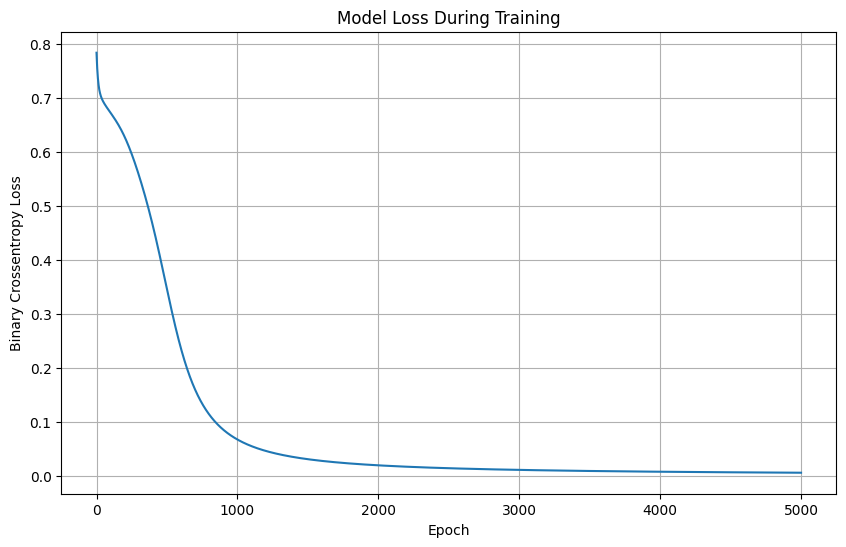

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step


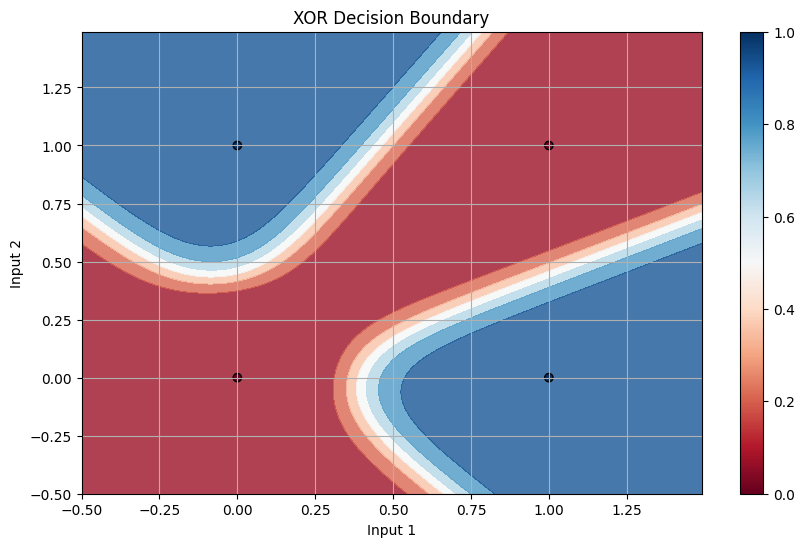

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# XOR outputs: 0 if inputs are the same, 1 if they are different
y = np.array([0, 1, 1, 0])

# Create a simple neural network with one hidden layer
model = Sequential([
    Input(shape=(2,)),          
    Dense(3, activation='tanh'),  # Hidden layer with 3 neurons using tanh activation
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Compile the model with learning rate of 0.1
optimizer = SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model and save the history to track loss over epochs
history = model.fit(X, y, epochs=5000, verbose=0)

# Evaluate the model on the XOR dataset
loss, accuracy = model.evaluate(X, y, verbose=0)
predictions = model.predict(X)
rounded_predictions = np.round(predictions)

print(f"Final loss: {loss:.4f}")
print(f"Final accuracy: {accuracy:.4f}")
print("\nRaw predictions on the XOR dataset:")
for i, pred in enumerate(predictions):
    print(f"Input: {X[i]} → Prediction: {pred[0]:.4f} → Rounded: {rounded_predictions[i][0]}")

# Visualize the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.ylabel('Binary Crossentropy Loss')
plt.xlabel('Epoch')
plt.grid(True)
sns.despine()
plt.show()

# Optional: Create a decision boundary visualization
plt.figure(figsize=(10, 6))

# Create a grid of points
h = 0.01
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Get predictions for all grid points
Z = model.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Decision Boundary')
plt.colorbar()
plt.grid(True)

plt.show()


## Brief Discussion of Optimizers

Keras provides several built-in optimizers that adjust the model parameters during training.  In addition to the classic **Stochastic Gradient Descent (SGD)**, there are more advanced optimizers like **adam** or **rmsprop**. 


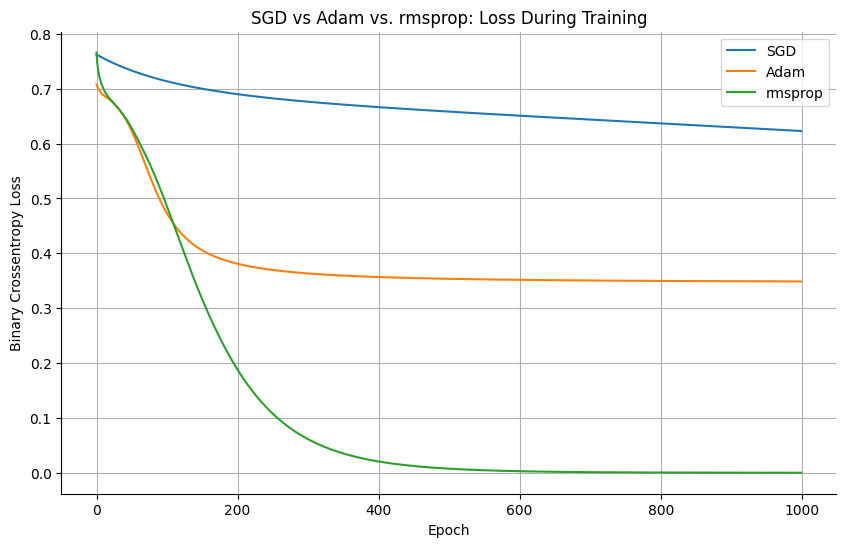

In [18]:
# Compare SGD with Adam optimizer
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
import seaborn as sns

# Function to train model with different optimizers
def train_with_optimizer(optimizer_name):
    # Reset the model
    model = Sequential([
        Input(shape=(2,)),          
        Dense(3, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])
    
    # Select optimizer
    if optimizer_name == 'SGD':
        opt = SGD(learning_rate=0.01)
    elif optimizer_name == "Adam":   
        opt = Adam(learning_rate=0.01)
    elif optimizer_name == "RMSprop":
        opt = RMSprop(learning_rate=0.01)
    
    model.compile(loss='binary_crossentropy', optimizer=opt)
    
    # Train and record history
    history = model.fit(X, y, epochs=1000, verbose=0)
    return history.history['loss']

# Train with both optimizers
sgd_loss = train_with_optimizer('SGD')
adam_loss = train_with_optimizer('Adam')
rmsprop_loss = train_with_optimizer('RMSprop')

# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(sgd_loss, label='SGD')
plt.plot(adam_loss, label='Adam')
plt.plot(rmsprop_loss, label='rmsprop')
plt.title('SGD vs Adam vs. rmsprop: Loss During Training')
plt.ylabel('Binary Crossentropy Loss')
plt.xlabel('Epoch')
plt.legend()
sns.despine()
plt.grid(True)
plt.show()